In [19]:
import pandas as pd
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [4]:
bank=pd.read_csv("D:\\logistic reg\\bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Find and Replace Encoding for month categorical varaible
bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [7]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
bank=bank.replace(order)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown,no


In [8]:
bank1=bank.copy()

In [9]:
bank1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# One-Hot Encoding of categrical variables
bank1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,0,1,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,0,1,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,0,1,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
bank1['default'] = bank1['default'].map({'yes': 1, 'no': 0})
bank1['housing'] = bank1 ['housing'].map({'yes': 1, 'no': 0})
bank1['loan'] = bank1['loan'].map({'yes': 1, 'no': 0})
bank1['y'] = bank1['y'].map({'yes': 1, 'no': 0})
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,0,1,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

# Dividing our data into input and output variables 

In [13]:
x=pd.concat([bank1.iloc[:,0:10],bank1.iloc[:,11:]],axis=1)
y=bank1.iloc[:,10]

# Logistic regresison model

In [14]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

# Predictions

In [15]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [16]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,1
45209,0,0


# Confusion Matrix for the model accuracy

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
print(cm)

[[39074   848]
 [ 4143  1146]]


In [20]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.22      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



0.597717349739536


Text(0, 0.5, 'True Positive Rate / Sensitivity')

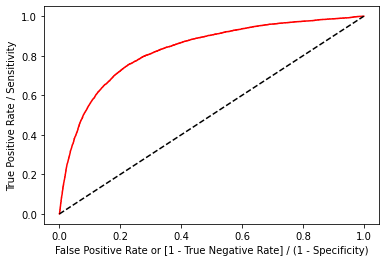

In [21]:
#ROC = Receiver Operating Curve
#AUC = Area Under Curve
#The greater the area under the curve, the better the model.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')